## SFN 24 Experiments MLP

### Imports

In [42]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
from imports import *

In [49]:
from models import *
from data import * 
from env import *
from harmonize import *
from metrics import * 
from sim import *
from sim import plot

In [50]:
# overall imports
import importlib
import data

# sim class
import sim.sim 
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
from sim.sim import Simulation
from sim.sim_run import single_sim_run, open_pickled_results
importlib.reload(sim.sim)
importlib.reload(sim.sim_utils)

import sim.plot
from sim.plot import (
    plot_predictions, 
    barplot_model_performance,
    boxplot_model_performance,
    plot_predictions_with_metrics, plot_single_model_predictions_with_metrics,
    plot_best_params_table, plot_best_parameters_table_colored, 
    violin_plot_model_performance, 
    plot_transcriptome_performance_bar, plot_connectome_performance_bar, 
    plot_combined_performance_bar
)

importlib.reload(sim.plot)


<module 'sim.plot' from '/scratch/asr655/neuroinformatics/GeneEx2Conn/sim/plot.py'>

#### Check job specs

In [51]:
print_system_usage()

total = psutil.disk_usage('/').total
print(bytes2human(total))

GPUtil.getGPUs()
print(f"Number of available GPUs: {torch.cuda.device_count()}")

DEVICE_ID_LIST = GPUtil.getFirstAvailable()
DEVICE_ID = DEVICE_ID_LIST[0] # grab first element from list
if DEVICE_ID != None: 
    print('GPU found', DEVICE_ID)
    use_gpu = True

print("XGBoost version:", xgboost.__version__)
print("cupy version:", cp.__version__)

GPUtil.showUtilization()

torch.cuda.empty_cache()


CPU Usage: 29.0%
RAM Usage: 12.0%
Available RAM: 886.1G
Total RAM: 1007.0G
52.4G
Number of available GPUs: 1
GPU found 0
XGBoost version: 2.0.3
cupy version: 13.1.0
| ID | GPU | MEM |
------------------
|  0 |  0% |  0% |


## Table of Contents
- [Multidataset PLS](#PLS)
    - [AHBA+HCP](#AHBA)
    - [GTEx+HCP](#GTEx)
    - [UTSW+HCP](#UTSW)
- [AHBA+HCP](#AHBA)
    - [Bilinear PLS](#PLS-Sims)
      - [Random Splits](#PLS-Random-Splits)
    - [XGBoost](#XGBoost-Sims)
      - [Random Splits](#XGBoost-Random-Splits)

### Development of new MLP base architecture w/ weights and biases

In [52]:
feature = 'transcriptomePCA'
print('FEATURE', feature)

# Run simulation with wandb tracking
single_sim_run(cv_type='random',
            model_type='dynamic neural net', 
            feature_type=[feature],
            summary_measure=None,
            use_gpu=True,
            use_shared_regions=False,
            test_shared_regions=False,
            save_sim=False,
            connectome_target='FC',
            search_method=('wandb', 'mse')
            )

FEATURE transcriptomePCA
Number of components explaining 95.0% of the variance: 34

 Test fold num: 1
(7140, 68) (7140,) (812, 68) (812,)
SEARCH METHOD ('wandb', 'mse')
wandb run
2
3
4
sweep config {'method': 'random', 'metric': {'name': 'val_loss', 'goal': 'minimize'}, 'parameters': {'hidden_dims': {'values': [[64, 32], [128, 64], [256, 128, 64]]}, 'learning_rate': {'distribution': 'log_uniform_values', 'min': 0.0001, 'max': 0.01}, 'batch_size': {'distribution': 'q_log_uniform_values', 'q': 8, 'min': 32, 'max': 256}, 'dropout_rate': {'distribution': 'uniform', 'min': 0.1, 'max': 0.5}, 'weight_decay': {'distribution': 'log_uniform_values', 'min': 1e-05, 'max': 0.001}, 'epochs': {'value': 100}}}
Create sweep with ID: 0fzjfpz9
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn_dynamicNN/sweeps/0fzjfpz9


wandb: Currently logged in as: asratzan (alexander-ratzan-new-york-university). Use `wandb login --relogin` to force relogin


CommError: failed to upsert bucket: api: failed sending: POST https://api.wandb.ai/graphql giving up after 1 attempt(s): Post "https://api.wandb.ai/graphql": tls: failed to verify certificate: x509: certificate signed by unknown authority

### Random

In [6]:
feature_types = [ 'transcriptome', 'transcriptomePCA', 'structural', 'euclidean', 'functional']

In [40]:
single_sim_run(cv_type='community',
            model_type='mlp',
            feature_type=['structural'],
            # summary_measure='strength_and_corr',
            use_gpu=True,
            use_shared_regions=False,
            test_shared_regions=False,
            save_sim=True,
            connectome_target='SC',
            search_method=('grid', 'pearson')
            )

Number of components explaining 95.0% of the variance: 34

 Test fold num: 1
(6320, 228) (6320,) (1122, 228) (1122,)
2
3
MOVED SOME CODE FROM HERE DOWN
GPU model input size 228
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Epoch [10/200], Loss: 3.7095
Epoch [20/200], Loss: 2.4019
Epoch [30/200], Loss: 2.0071
Epoch [40/200], Loss: 1.1009
Epoch [50/200], Loss: 0.7681
Epoch [60/200], Loss: 0.6471
Epoch [70/200], Loss: 0.5946
Epoch [80/200], Loss: 0.3400
Epoch [90/200], Loss: 0.2865
Epoch [100/200], Loss: 0.2289
Epoch [110/200], Loss: 0.2994
Epoch [120/200], Loss: 0.2236
Epoch [130/200], Loss: 0.2313
Epoch [140/200], Loss: 0.2276
Epoch [150/200], Loss: 0.2072
Epoch [160/200], Loss: 0.1793
Epoch [170/200], Loss: 0.1568
Epoch [180/200], Loss: 0.1469
Epoch [190/200], Loss: 0.1453
Epoch [200/200], Loss: 0.1434
[CV 1/2] END batch_size=32, epochs=200, l2_reg=0, lr=0.001;, score=(train=0.857, test=0.587) total time=  23.6s
Epoch [10/200], Loss: 3.6573
Epoch [20/200], Loss: 2.5034
Epo

[[{'model_parameters': {'batch_size': 32,
    'dropout': 0.0,
    'epochs': 200,
    'hidden_dims': [256, 128],
    'input_dim': 228,
    'l2_reg': 0,
    'lr': 0.001,
    'max_grad_norm': 1.0,
    'output_dim': 1},
   'train_metrics': {'mse': 2.4113289864906022,
    'mae': 1.1758905660014034,
    'r2': 0.7652059723751776,
    'pearson_corr': 0.8951569445286408,
    'connectome_corr': 0.8922560515671363,
    'connectome_r2': 0.7639443313338408,
    'geodesic_distance': 8.825773643400773},
   'best_val_score': 0.6343360519935572,
   'test_metrics': {'mse': 5.659310157417305,
    'mae': 1.6139535060439556,
    'r2': 0.5143260947017269,
    'pearson_corr': 0.7564555794496751,
    'connectome_corr': 0.7763048193129184,
    'connectome_r2': 0.5096557151076848,
    'geodesic_distance': 8.09551645480782},
   'y_true': array([10.397 , 10.397 , 10.11  , ...,  0.    ,  4.3019,  4.3019]),
   'y_pred': array([[ 5.8675933 ],
          [ 6.899292  ],
          [ 9.015563  ],
          ...,
         

In [8]:
random_sim_path = 'neuroinformatics/GeneEx2Conn/sim/sim_results/transcriptome_mlp_random_42_grid_pearsonsearch.pickle'
transcriptome_mlp_community101_1_grid_pearsonsearch

NameError: name 'transcriptome_mlp_community101_1_grid_pearsonsearch' is not defined

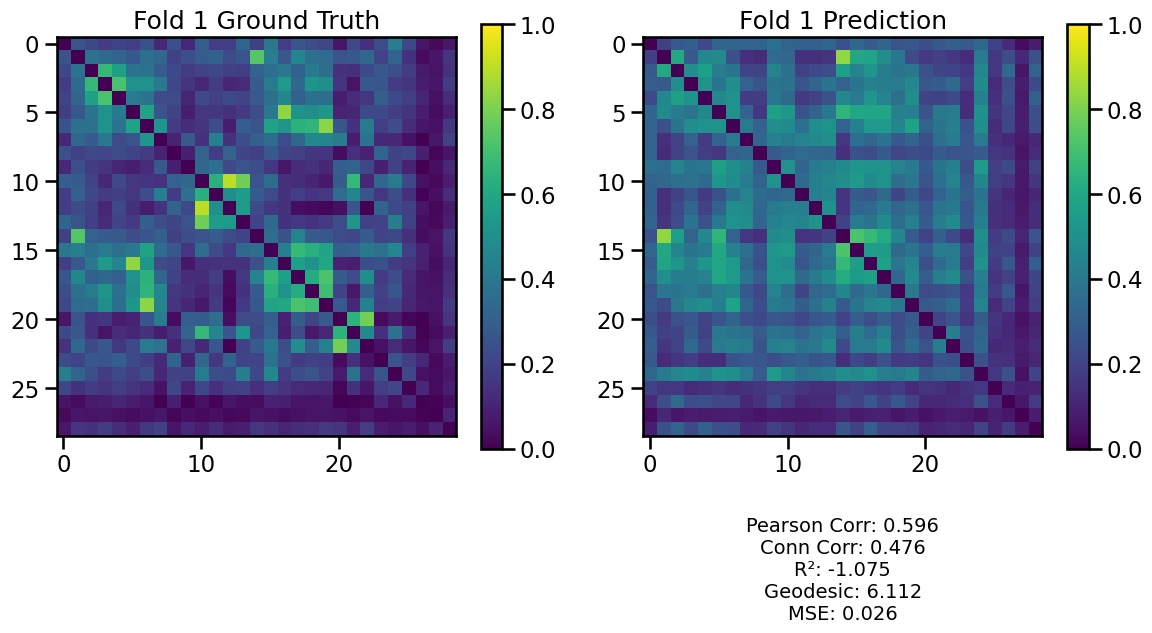

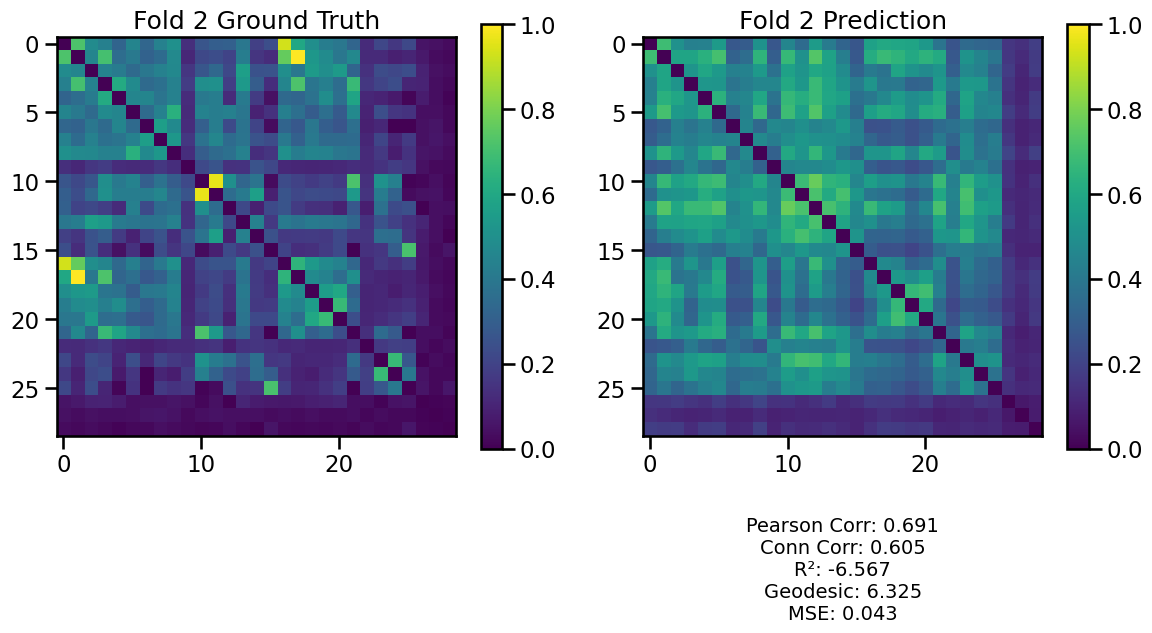

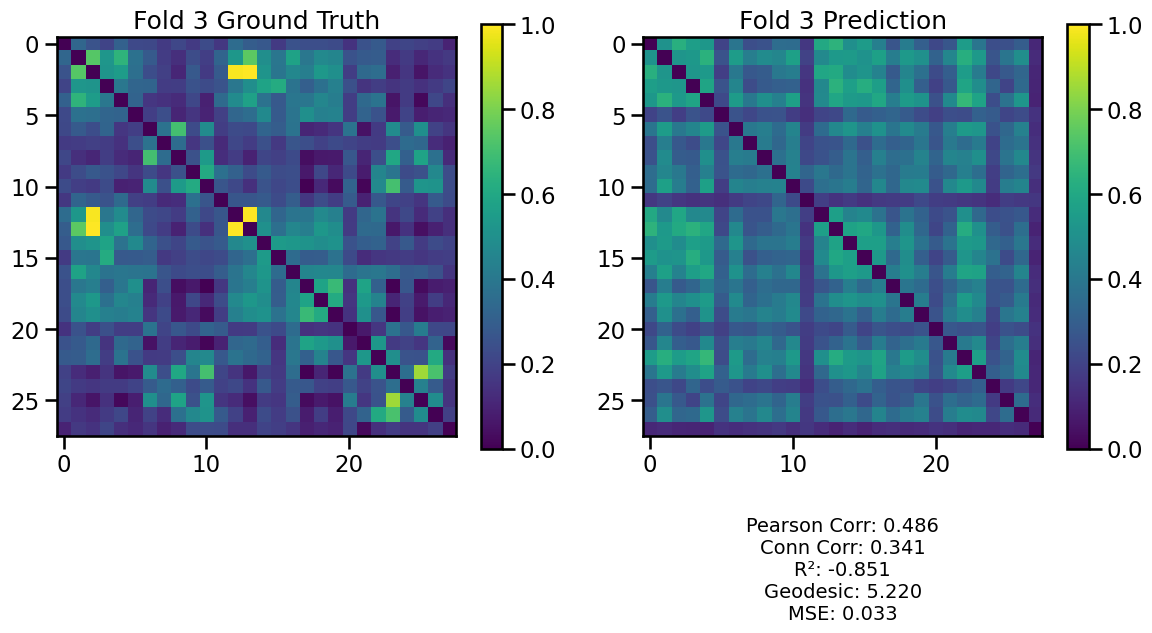

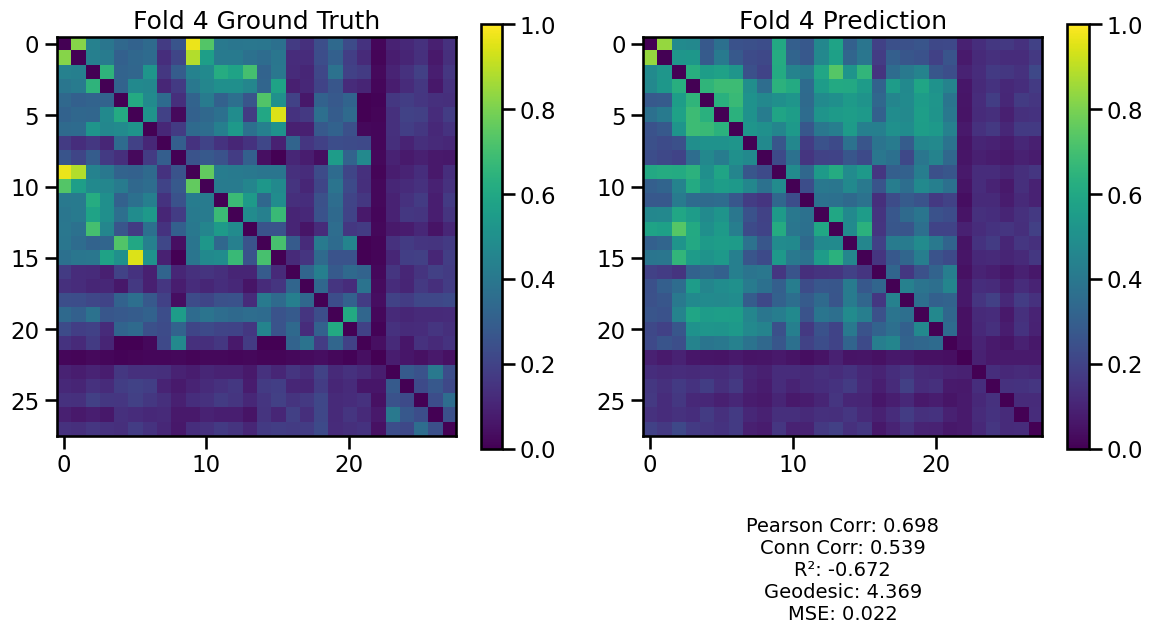

In [16]:
results = open_pickled_results('transcriptome_mlp_random_42_grid_pearsonsearch.pickle', '')
plot_single_model_predictions_with_metrics(results)

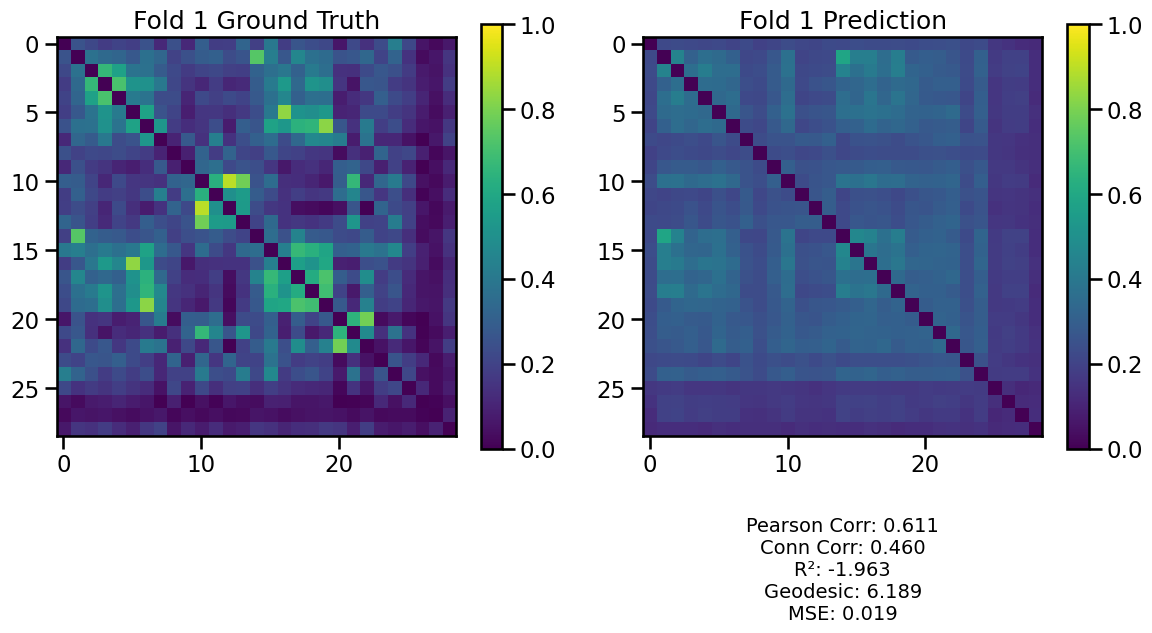

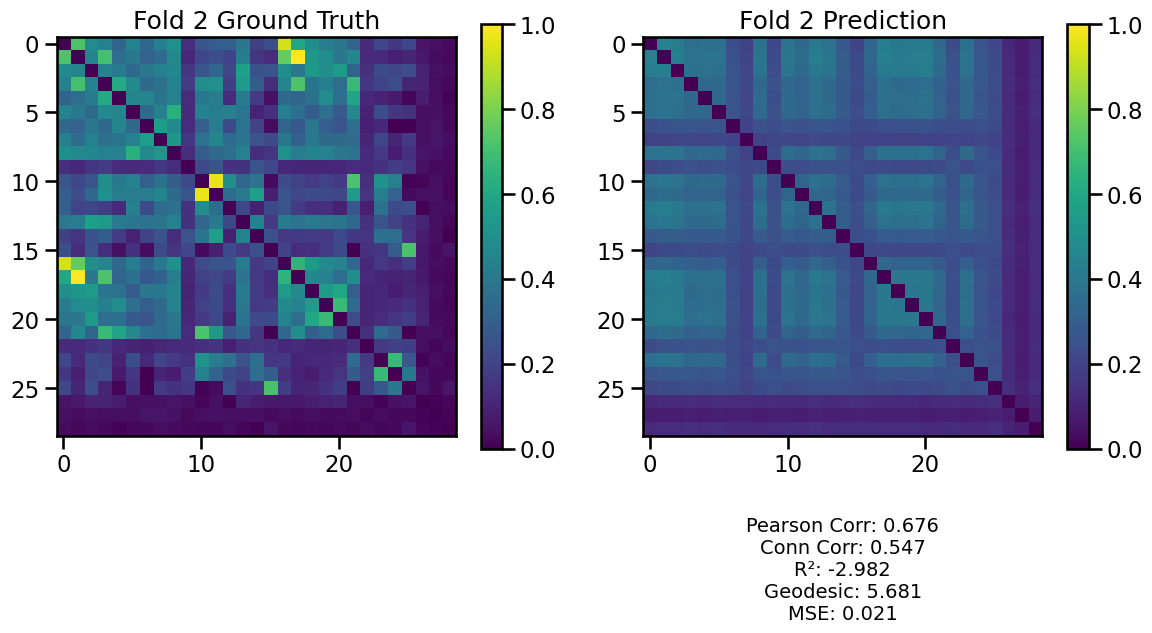

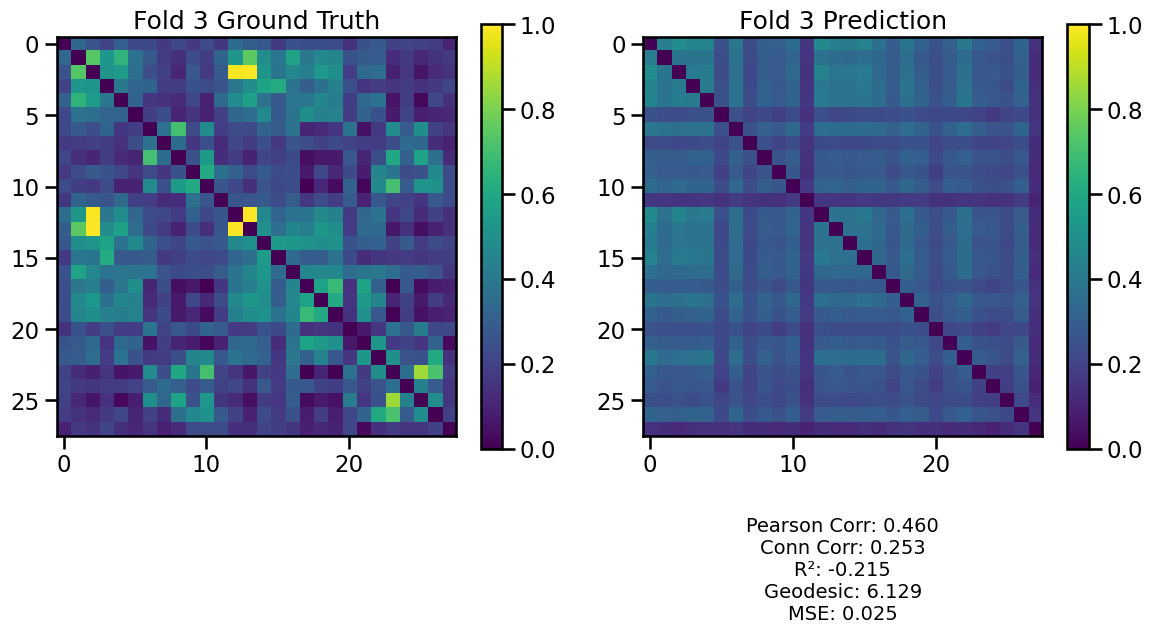

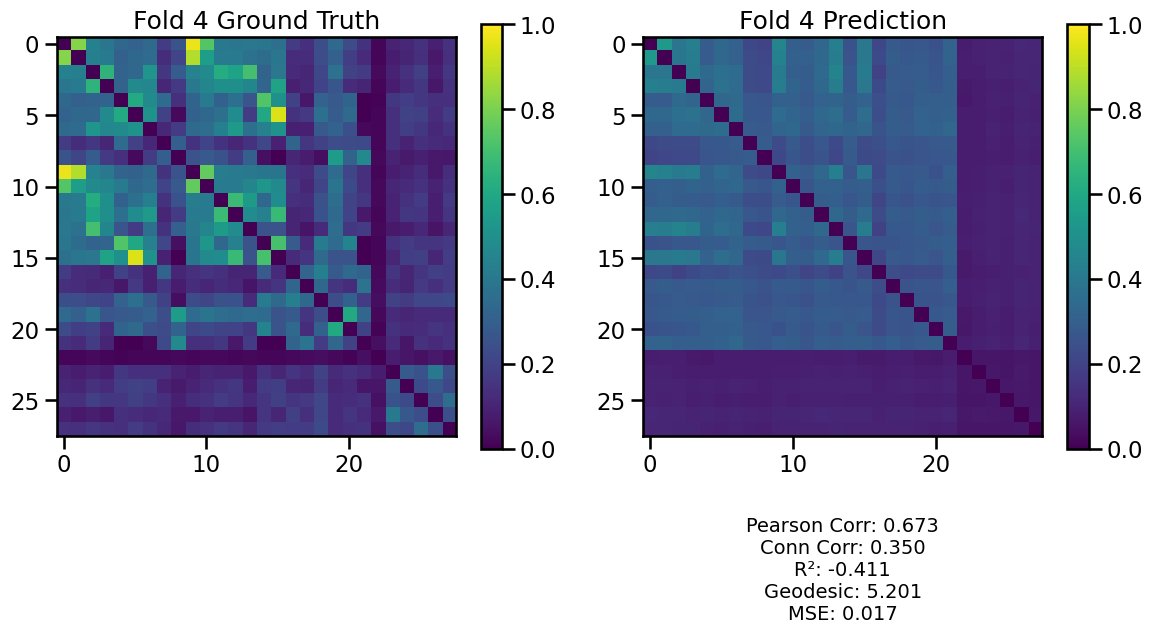

In [18]:
results = open_pickled_results('transcriptome_xgboost_random_42_bayessearch.pickle', '')
plot_single_model_predictions_with_metrics(results)

### Community (loop these to search over different resolutions+seeds)

In [ ]:
resolutions = [1.01, 1.02]
seeds = [0, 1, 2, 3, 4, 5, 42]

for r in resolutions:
    for s in seeds:
        for feature in feature_types:
            print('FEATURE', feature)
            single_sim_run(cv_type='community',
                      model_type='xgboost',
                      feature_type=[feature],
                      use_gpu=True,
                      use_shared_regions=False,
                      test_shared_regions=False,
                      save_sim=True,
                      resolution=r,
                      random_seed=s,
                      search_method='bayes'
                      )

# DONE

FEATURE transcriptome
Number of components explaining 95.0% of the variance: 34
self X shape (114, 11053)
Processing fold 0...
Processing fold 1...
Processing fold 2...
Processing fold 3...

 Test fold num: 1
(8930, 22106) (8930,) (342, 22106) (342,)
2
3
4
Processing fold 0...
Processing fold 1...
Processing fold 2...
ACCELERATING
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=4, n_estimators=350, n_gpus=-1, random_state=42, reg_alpha=0.1, reg_lambda=0.0001, subsample=0.8, tree_method=gpu_hist, verbosity=0;, score=0.609 total time=   8.9s
[CV 2/3] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=4, n_estimators=350, n_gpus=-1, random_state=42, reg_alpha=0.1, reg_lambda=0.0001, subsample=0.8, tree_method=gpu_hist, verbosity=0;, score=0.086 total time=   4.0s
[CV 3/3] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=4, n_estimators=350, n_gpus=-1, random_state=

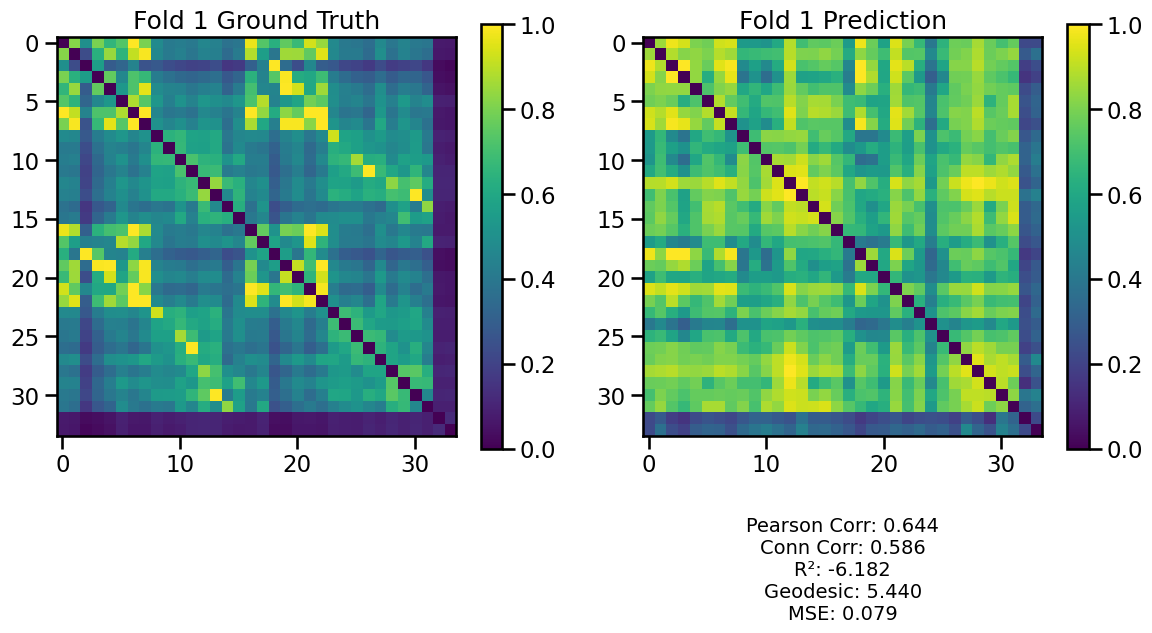

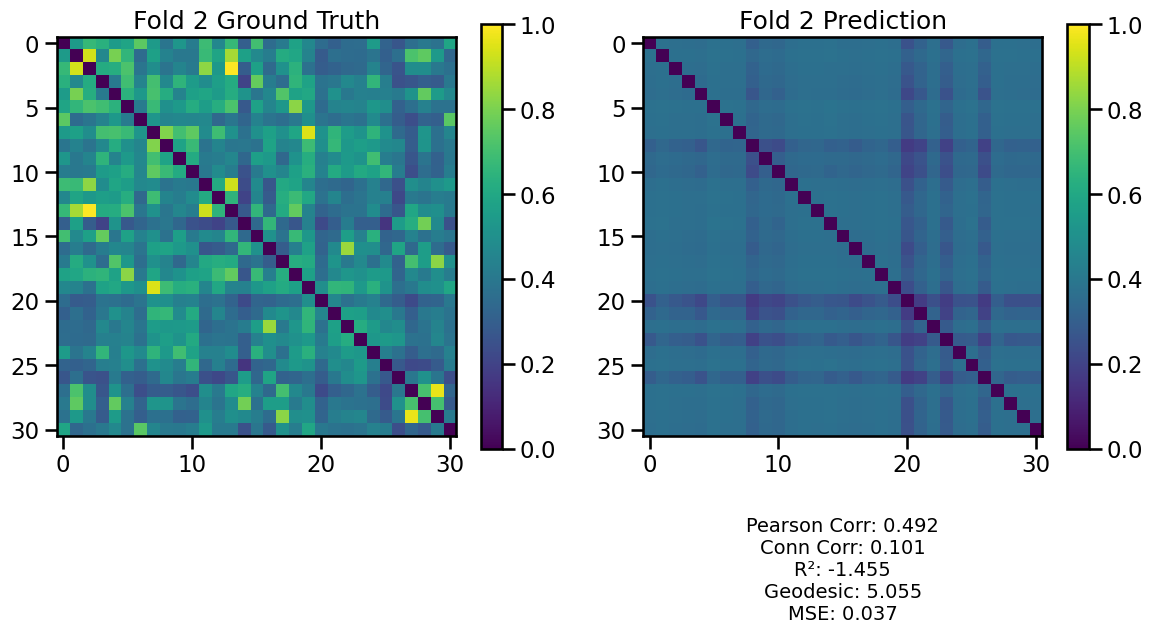

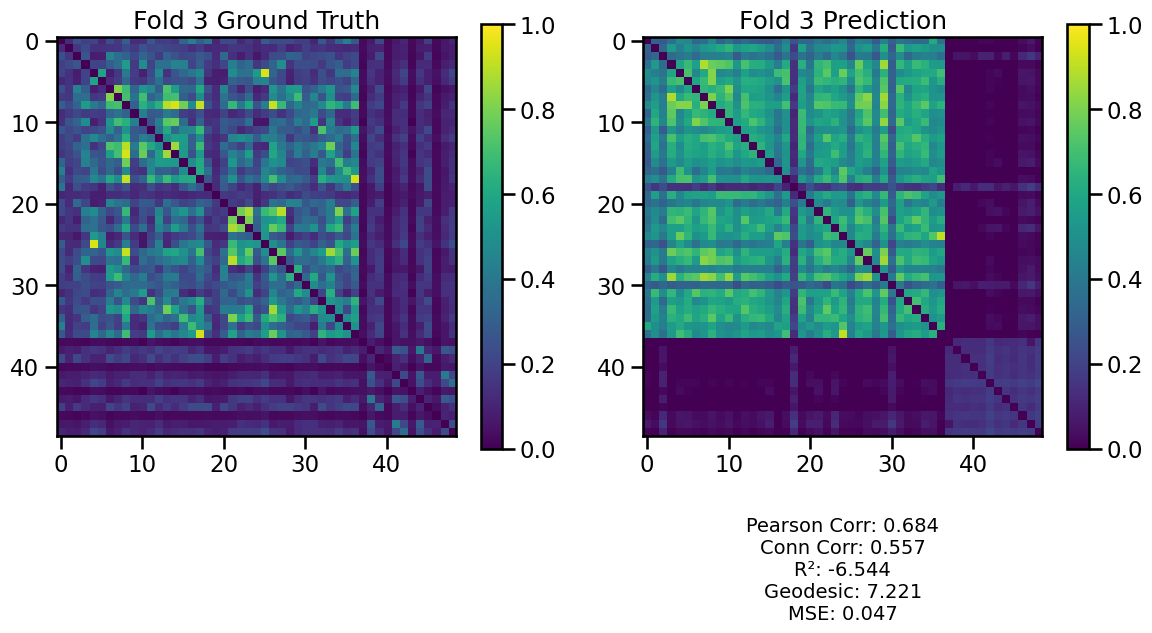

In [17]:
results = open_pickled_results('transcriptome_mlp_community101_1_grid_pearsonsearch.pickle', '')
plot_single_model_predictions_with_metrics(results)

In [ ]:
for r in resolutions:
    for s in seeds:
    # Loop over every pairwise combination of features
    for feature_pair in itertools.combinations(feature_types, 2):
        print('FEATURE', feature_pair)
        single_sim_run(cv_type='community',
                       model_type='xgboost',
                       feature_type=list(feature_pair),  # Convert tuple to list
                       use_gpu=True,
                       use_shared_regions=False,
                       test_shared_regions=False,
                       save_sim=True,
                       resolution=1.01,
                       random_seed=42,
                       search_method='bayes'
                       )

In [ ]:
for r in resolutions:
    for s in seeds:
        # Loop over every triple combination of features
        for feature_triple in itertools.combinations(feature_types, 3):
            print('FEATURE', feature_triple)
            single_sim_run(cv_type='community',
                           model_type='xgboost',
                           feature_type=list(feature_triple),  # Convert tuple to list
                           use_gpu=True,
                           use_shared_regions=False,
                           test_shared_regions=False,
                           save_sim=True,
                           resolution=1.01,
                           random_seed=42,
                           search_method='bayes'
                           )
